<a href="https://colab.research.google.com/github/DataScientist64/DataAnalysis/blob/main/NeuralNetwork.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [19]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import torch
import torch.nn as nn
import torch.optim as optim

In [2]:
df = pd.read_csv("/content/league_of_legends_data_large.csv")

In [3]:
df.head(5)

,win,kills,deaths,assists,gold_earned,cs,wards_placed,wards_killed,damage_dealt
0,0,16,6,19,17088,231,11,7,15367
1,1,8,8,5,14865,259,10,2,38332
2,0,0,17,11,15919,169,14,5,24642
3,0,19,11,1,11534,264,14,3,15789
4,0,12,7,6,18926,124,15,7,40268


In [5]:
df.isna().sum()

,0
win,0
kills,0
deaths,0
assists,0
gold_earned,0
cs,0
wards_placed,0
wards_killed,0
damage_dealt,0


In [6]:
df.dtypes

,0
win,int64
kills,int64
deaths,int64
assists,int64
gold_earned,int64
cs,int64
wards_placed,int64
wards_killed,int64
damage_dealt,int64


In [7]:
X = df.drop('win',axis=1)
y = df['win']

In [8]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)

In [10]:
scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [14]:
X_train_tensor = torch.tensor(X_train_scaled, dtype=torch.float32)
X_test_tensor = torch.tensor(X_test_scaled, dtype=torch.float32)

y_train_tensor = torch.tensor(y_train.values, dtype=torch.float32)
y_test_tensor = torch.tensor(y_test.values, dtype=torch.float32)

In [15]:
from sklearn.linear_model import LogisticRegression

In [28]:
class LogisticRegression(nn.Module):
  def __init__(self,input_dim):
    super(LogisticRegression,self).__init__()
    self.linear = nn.Linear(input_dim,1)

  def forward(self, x):
    return torch.sigmoid(self.linear(x))

In [29]:
input_dim = X_train.shape[1]
model = LogisticRegression(input_dim)
criterion = nn.BCELoss()
optimizer = optim.SGD(model.parameters(), lr = 0.01)

In [30]:
num_epochs = 1000

In [35]:
for epoch in range(num_epochs):
  model.train()
  optimizer.zero_grad()
  output = model(X_train_tensor)
  loss = criterion(output.squeeze(), y_train_tensor)
  loss.backward()
  optimizer.step()

In [36]:
if (epoch + 1) % 100 == 0:
        print(f"Epoch [{epoch+1}/{num_epochs}], Loss: {loss.item():.4f}")

Epoch [1000/1000], Loss: 0.6853


In [37]:
model.eval()

with torch.no_grad():
    # Predictions on training data
    train_outputs = model(X_train_tensor)
    train_preds = (train_outputs >= 0.5).float()

    # Predictions on test data
    test_outputs = model(X_test_tensor)
    test_preds = (test_outputs >= 0.5).float()

In [38]:
train_accuracy = (train_preds.squeeze() == y_train_tensor).float().mean()
test_accuracy = (test_preds.squeeze() == y_test_tensor).float().mean()

print(f"Training Accuracy: {train_accuracy.item() * 100:.2f}%")
print(f"Test Accuracy: {test_accuracy.item() * 100:.2f}%")

Training Accuracy: 54.50%
Test Accuracy: 51.00%


In [40]:
input_dim = X_train.shape[1]
model = LogisticRegression(input_dim)

In [41]:
optimizer = optim.SGD(
    model.parameters(),
    lr=0.01,
    weight_decay=0.01  # L2 regularization
)

In [42]:
criterion = nn.BCELoss()

In [43]:
num_epochs = 1000

for epoch in range(num_epochs):

    model.train()

    optimizer.zero_grad()

    outputs = model(X_train_tensor)
    loss = criterion(outputs.squeeze(), y_train_tensor)

    loss.backward()
    optimizer.step()

    if (epoch + 1) % 100 == 0:
        print(f"Epoch [{epoch+1}/{num_epochs}], Loss: {loss.item():.4f}")

Epoch [100/1000], Loss: 0.7251
Epoch [200/1000], Loss: 0.7085
Epoch [300/1000], Loss: 0.6988
Epoch [400/1000], Loss: 0.6931
Epoch [500/1000], Loss: 0.6898
Epoch [600/1000], Loss: 0.6880
Epoch [700/1000], Loss: 0.6869
Epoch [800/1000], Loss: 0.6862
Epoch [900/1000], Loss: 0.6858
Epoch [1000/1000], Loss: 0.6856


In [44]:
model.eval()

with torch.no_grad():
    # Training predictions
    train_outputs = model(X_train_tensor)
    train_preds = (train_outputs >= 0.5).float()

    # Testing predictions
    test_outputs = model(X_test_tensor)
    test_preds = (test_outputs >= 0.5).float()

In [46]:
train_accuracy = (train_preds.squeeze() == y_train_tensor).float().mean()
test_accuracy = (test_preds.squeeze() == y_test_tensor).float().mean()

print(f"Training Accuracy (L2): {train_accuracy.item() * 100:.2f}%")
print(f"Test Accuracy (L2): {test_accuracy.item() * 100:.2f}%")

Training Accuracy (L2): 55.50%
Test Accuracy (L2): 51.50%


In [47]:
import matplotlib.pyplot as plt
from sklearn.metrics import (
    confusion_matrix,
    ConfusionMatrixDisplay,
    roc_curve,
    auc,
    classification_report
)

In [48]:
# Reinitialize model
input_dim = X_train.shape[1]
model = LogisticRegression(input_dim)

# Optimizer with L2 regularization
optimizer = torch.optim.SGD(
    model.parameters(),
    lr=0.01,
    weight_decay=0.01
)

criterion = torch.nn.BCELoss()

num_epochs = 1000

for epoch in range(num_epochs):
    model.train()

    optimizer.zero_grad()
    outputs = model(X_train_tensor)
    loss = criterion(outputs.squeeze(), y_train_tensor)

    loss.backward()
    optimizer.step()


In [49]:
model.eval()

with torch.no_grad():
    train_probs = model(X_train_tensor).squeeze()
    test_probs = model(X_test_tensor).squeeze()

    train_preds = (train_probs >= 0.5).int()
    test_preds = (test_probs >= 0.5).int()

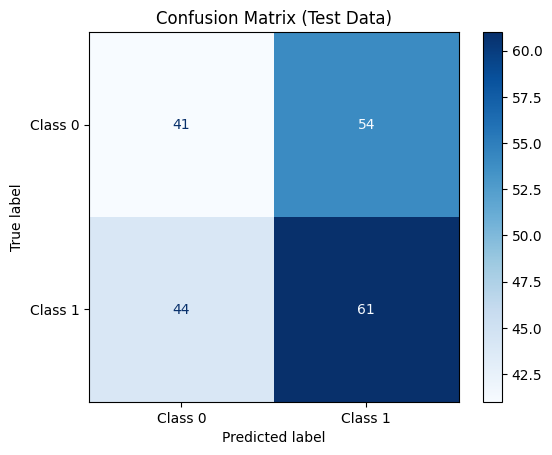

In [50]:
cm = confusion_matrix(y_test_tensor, test_preds)

disp = ConfusionMatrixDisplay(
    confusion_matrix=cm,
    display_labels=["Class 0", "Class 1"]
)

disp.plot(cmap="Blues")
plt.title("Confusion Matrix (Test Data)")
plt.show()

In [51]:
fpr, tpr, thresholds = roc_curve(y_test_tensor, test_probs)
roc_auc = auc(fpr, tpr)

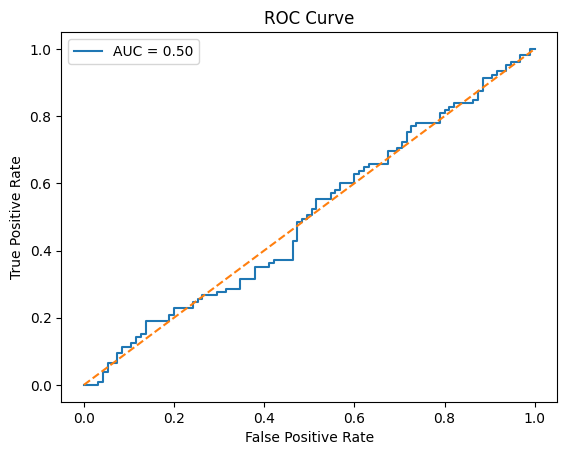

In [52]:
plt.figure()
plt.plot(fpr, tpr, label=f"AUC = {roc_auc:.2f}")
plt.plot([0, 1], [0, 1], linestyle="--")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend()
plt.show()

In [53]:
print("Classification Report (Test Data):")
print(classification_report(
    y_test_tensor,
    test_preds,
    target_names=["Class 0", "Class 1"]
))

Classification Report (Test Data):
              precision    recall  f1-score   support

     Class 0       0.48      0.43      0.46        95
     Class 1       0.53      0.58      0.55       105

    accuracy                           0.51       200
   macro avg       0.51      0.51      0.51       200
weighted avg       0.51      0.51      0.51       200



In [54]:
torch.save(model.state_dict(), "logistic_regression_l2.pth")

In [55]:
loaded_model = LogisticRegression(input_dim)

In [56]:
loaded_model.load_state_dict(torch.load("logistic_regression_l2.pth"))

<All keys matched successfully>

In [57]:
loaded_model.eval()

LogisticRegression(
  (linear): Linear(in_features=8, out_features=1, bias=True)
)

In [58]:
with torch.no_grad():
    test_outputs_loaded = loaded_model(X_test_tensor)
    test_preds_loaded = (test_outputs_loaded >= 0.5).float()

In [59]:
loaded_test_accuracy = (
    test_preds_loaded.squeeze() == y_test_tensor
).float().mean()

In [60]:
print(f"Test Accuracy (Loaded Model): {loaded_test_accuracy.item() * 100:.2f}%")

Test Accuracy (Loaded Model): 51.00%


In [62]:
learning_rates = [0.01, 0.05, 0.1]
epochs = 100

In [63]:
test_accuracies = {}

In [66]:
for lr in learning_rates:

    print(f"\nTraining with learning rate = {lr}")

    # Reinitialize model
    model = LogisticRegression(input_dim)

    # Optimizer (no regularization here unless specified)
    optimizer = torch.optim.SGD(model.parameters(), lr=lr)

    criterion = torch.nn.BCELoss()

    # Training loop
    for epoch in range(num_epochs):
        model.train()

        optimizer.zero_grad()
        outputs = model(X_train_tensor)
        loss = criterion(outputs.squeeze(), y_train_tensor)

        loss.backward()
        optimizer.step()

    # Evaluation
    model.eval()
    with torch.no_grad():
        test_outputs = model(X_test_tensor)
        test_preds = (test_outputs >= 0.5).float()

    test_accuracy = (
        test_preds.squeeze() == y_test_tensor
    ).float().mean().item()

    test_accuracies[lr] = test_accuracy

    print(f"Test Accuracy: {test_accuracy * 100:.2f}%")



Training with learning rate = 0.01
Test Accuracy: 52.00%

Training with learning rate = 0.05
Test Accuracy: 50.50%

Training with learning rate = 0.1
Test Accuracy: 50.50%


In [67]:
best_lr = max(test_accuracies, key=test_accuracies.get)
best_accuracy = test_accuracies[best_lr]

In [68]:
print("\nHyperparameter Tuning Results:")
for lr, acc in test_accuracies.items():
    print(f"Learning Rate: {lr} → Test Accuracy: {acc * 100:.2f}%")

print(f"\nBest Learning Rate: {best_lr}")
print(f"Best Test Accuracy: {best_accuracy * 100:.2f}%")


Hyperparameter Tuning Results:
Learning Rate: 0.01 → Test Accuracy: 52.00%
Learning Rate: 0.05 → Test Accuracy: 50.50%
Learning Rate: 0.1 → Test Accuracy: 50.50%

Best Learning Rate: 0.01
Best Test Accuracy: 52.00%


In [69]:
weights = model.linear.weight.data.numpy().flatten()

In [72]:
feature_importance = pd.DataFrame({
    "Feature": X_train.columns,
    "Importance": weights
})

In [73]:
feature_importance["Abs_Importance"] = feature_importance["Importance"].abs()

In [74]:
feature_importance_sorted = feature_importance.sort_values(by='Abs_Importance', ascending=False)

In [75]:
feature_importance_sorted

,Feature,Importance,Abs_Importance
3,gold_earned,0.175341,0.175341
0,kills,0.130974,0.130974
5,wards_placed,0.106087,0.106087
6,wards_killed,-0.034605,0.034605
7,damage_dealt,-0.018873,0.018873
2,assists,-0.013663,0.013663
4,cs,-0.007268,0.007268
1,deaths,-0.005131,0.005131


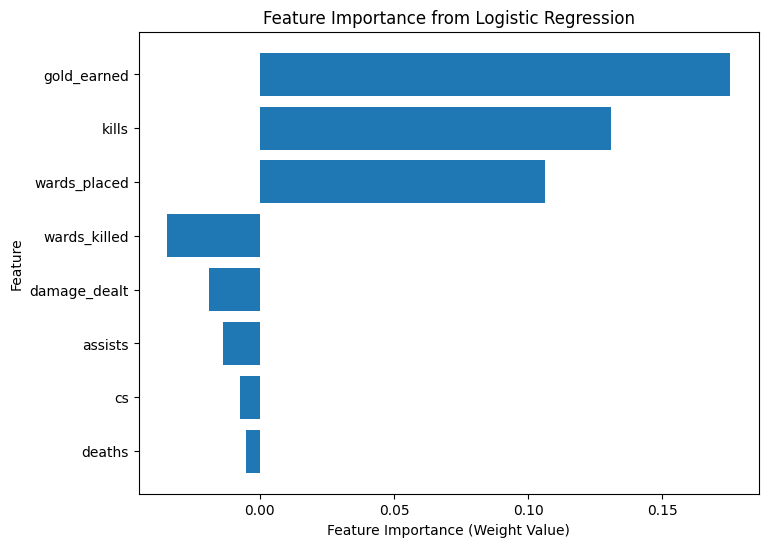

In [76]:
plt.figure(figsize=(8, 6))
plt.barh(
    feature_importance_sorted["Feature"],
    feature_importance_sorted["Importance"]
)
plt.xlabel("Feature Importance (Weight Value)")
plt.ylabel("Feature")
plt.title("Feature Importance from Logistic Regression")
plt.gca().invert_yaxis()  # Most important on top
plt.show()